In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ( confusion_matrix, ConfusionMatrixDisplay )

In [50]:
iris = load_iris()
X, y = iris.data, iris.target

In [51]:
iris_data = np.hstack((X, y.reshape(-1, 1)))
iris_column_names = list(iris.feature_names) + ["target"]
df = pd.DataFrame(data=iris_data, columns=iris_column_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

In [54]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [55]:
model = LogisticRegression(random_state=123, penalty="l2")
model.fit(X=X_train_scaled, y=y_train)

LogisticRegression(random_state=123)

In [56]:
y_pred = model.predict(X_test_scaled)

In [57]:
mean_accuracy_score = model.score(X_test_scaled, y_test)
print(f"Mean Accuracy : {mean_accuracy_score}")

Mean Accuracy : 0.9666666666666667


In [58]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


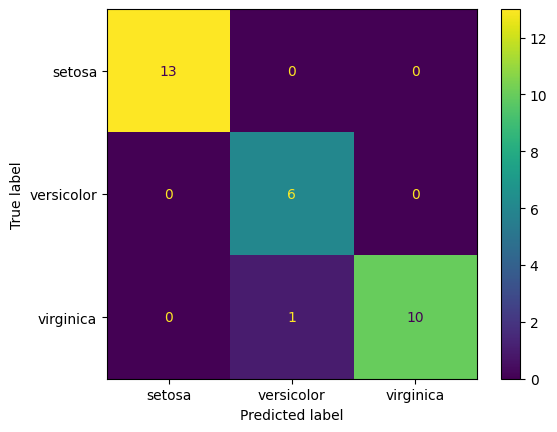

In [59]:
cm_plot = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
cm_plot.plot()
plt.show()